https://public.tableau.com/app/profile/mukhlish/viz/Milestone1_16771650737430/Dashboard1#1
https://public.tableau.com/app/profile/mukhlish/viz/Milestone1_1/Dashboard2

# Milestone 1

# I. Perkenalan
Nama   : Mukhlish Rasyidi

Batch  : 18 RMT


# II. Identifikasi Masalah

## Topik Masalah
Pada project Milestone 1 ini topik masalah yang saya angkat adalah Transportasi Umum yang dikelola atau disediakan oleh Pemerintah DKI Jakarta.

## Latar Belakang
Sebagai Ibu Kota Indonesia, Pemerintah Provinsi DKI Jakarta berusaha untuk memenuhi kebutuhan sehari- hari warganya. Data tahun 2021, jumlah warga DKI usia produktif 20-54 tahun sebanyak 5.795.801 jiwa (sumber: BPS Provinsi DKI).

Salah satu kebutuhan yang paling dibutuhkan warga DKI adalah transportasi umum untuk bisa digunakan sebagai alat transportasi warga DKI pergi dan pulang bekerja ataupun untuk keperluan lainnya dengan harga yang terjangkau.

Menjawab kebutuhan tersebut, Pemprov DKI sudah berusaha dengan menyediakan beberapa jenis Public Transport yang langsung dikelola oleh Pemprov DKI agar bisa memastikan kualitas dan harga yang terjangkau oleh masyarakat. Namun apakah semua jenis Public Transport tersebut digunakan oleh warga DKI, atau Public Transport yang disediakan hanya sekedar menggugurkan kewajiban Pemprov DKI saja karena sedikit yang menggunakannya.

## Problem Statement 
Berdasarkan latar belakang diatas, problem statement yang akan diangkat di Project Milestone ini adalah ' Mengetahui jenis dan trayek Public Transport yang dikelola Pemprov DKI Jakarta serta perbandingan jumlah pengguna berdasarkan jenis dan trayek pada kurun waktu tahun 2021'.

## Penjabaran Masalah
Dari problem statement yang sudah ditentukan, dilakukan penjabaran masalah sebagai berikut:


1. Apa saja jenis Public Transport yang dikelola Pemprov DKI?
2. Apa saja Trayek yang disediakan dari setiap jenis Public Transport?
3. Berapa banyak pengguna Public Transport dan dari setiap jenis Public Transport pertahun dan perharinya?
4. Berapa persen pengguna public transport dibanding jumlah pengguna jalan raya di DKI jakarta?
5. Trayek mana yang paling banyak dan paling sedikit digunakan masyarakat dari setiap jenis public transport dalam kurun waktu 1 tahun?
6. Pada bulan apa di tahun 2021 pengguna Public Transport terbanyak?
7. Dari jenis Public Transport terbanyak digunakan bagaimana sebaran pengguna dari trayeknya, apakah merata? (statistik deskriptif)
8. Apakah setiap jenis public transport memiliki perbedaan jumlah penggunanya pada tahun 2021? (statistik inferensial)


# III. Data Loading

## Import Pustaka
Untuk project ini menggunakan beberapa library yaitu:

* pandas untuk pengolahan tabular,
* numpy untuk pengolahan numeric,
* matplotlib untuk visualisasi data
* seaborn untuk membuat grafik statistik
* scipy untuk melakukan perhitungan scientific dan statistik


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px    
from calendar import monthrange

# untuk mencek version library yang digunakan
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(sns.__version__))

pandas: 1.3.5
numpy: 1.22.4
matplotlib: 3.2.2
seaborn: 0.11.2


## Query Dataframe
Project ini saya menggunakan data Penumpang Transjakarta dan Data Penumpang MRT Tahun 2021 dari situs Pemprov DKI, "data.jakarta.go.id". Untuk Data Penumpang Transjakarta didownload berdasarkan perbulan. Semua data dalam bentuk  csv, kemudian dengan my SQL dibuat table baru dengan nama PublicTransport dan diinsert dari tabel yang didownload ke dalam table tersebut. Berikut Script querynya. Setelahnya dilakukan export menjadi 1 table sebagai dataframe tugas ini. 



```
# Membuat tabel penampung
create table public_transport_DKI2021
( 
tahun INT,
bulan int,
jenis varchar(50),
kode_trayek varchar(50),
trayek varchar(50),
jumlah_penumpang numeric
);

# Memasukan isi tabel dari setiap tabel yang didownload ke tabel penampung,total ada 13 tabel.

insert into public_transport_dki2021
select * from 
`data-penumpang-bus-transjakarta-desember-2021`;


# Khusus tabel MRT ada perbedaan isi karena datanya tidak diberikan trayek sehingga awalnya kosong.
Dibuatkan column baru dengan tidak ada isi. Dan juga ada rename column dari jumlah, menjadi jumlah _ penumpang

# Merubah nama Column
alter table `data-penumpang-mrt-di-provinsi-dki-jakarta-tahun-2021` RENAME COLUMN jumlah TO jumlah_penumpang;

# Menambahkan column setelah column tertentu
ALTER table `data-penumpang-mrt-di-provinsi-dki-jakarta-tahun-2021`
ADD column kode_trayek varchar(10) AFTER jenis;

ALTER table `data-penumpang-mrt-di-provinsi-dki-jakarta-tahun-2021`
ADD column trayek varchar(50) AFTER kode_trayek;
```

## Read dataframe
Mengunakan pandas read data csv hasil export query SQL

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mukhlishr/rasyidi/main/publictransDKI2021.csv')

In [ ]:
# Menampilkan head
df.head()

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,1,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,1473.0
1,2021,1,Mikrotrans,JAK.85,Bintara - Cipinang Indah,20280.0
2,2021,1,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,28779.0
3,2021,1,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,54998.0
4,2021,1,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,60284.0


In [ ]:
# Menampilkan tail
df.tail()

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
1480,2021,12,Angkutan Umum Integrasi,1A,PIK - Balai Kota,0.0
1481,2021,12,Angkutan Umum Integrasi,12B,Pluit - Senen,0.0
1482,2021,12,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,0.0
1483,2021,12,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0
1484,2021,12,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,0.0


In [ ]:
df.sort_values(by='trayek', ascending=False)

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
69,2021,1,Mikrotrans,JAK.01,Ttanjung Priok - Plumpang,56172.0
689,2021,6,Mikrotrans,JAK.01,Ttanjung Priok - Plumpang,62146.0
26,2021,1,Mikrotrans,JAK.43,Tongtek - Cililitan,74225.0
1260,2021,11,Mikrotrans,JAK.43,Tongtek - Cililitan,104411.0
894,2021,8,Mikrotrans,JAK.43,Tongtek - Cililitan,58213.0
...,...,...,...,...,...,...
129,2021,10,MRT,NaN,NaN,707584.0
130,2021,11,MRT,NaN,NaN,907123.0
131,2021,12,MRT,NaN,NaN,1098264.0
1423,2021,12,Mikrotrans,JAK.10B,NaN,4085.0


Ada Typo untuk Ttanjung Priok, seharusnya Tanjung Priok

In [ ]:
# Mencek info dataframe
df.info()

# berisi 1485 baris dan 6 column, tipe integer untuk tahun dan bulan
# tipe object jenis, kode trayek, trayek. tipe float untuk jumlah penumpang

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tahun             1485 non-null   int64  
 1   bulan             1485 non-null   int64  
 2   jenis             1485 non-null   object 
 3   kode_trayek       1473 non-null   object 
 4   trayek            1471 non-null   object 
 5   jumlah_penumpang  1485 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 69.7+ KB


In [ ]:
# Mengetahui list data bertipe object dan number
obj_cols= list(df.select_dtypes('object'))
num_cols= list(df.select_dtypes('number'))
print(obj_cols)
print(num_cols)

['jenis', 'kode_trayek', 'trayek']
['tahun', 'bulan', 'jumlah_penumpang']


# IV. Data Cleaning
Pada bagian ini adalah melihat apakah ada data yang missing, dan dari data yang missing tersebut akan di drop atau diisi data tertentu. Selain itu juga akan dilakukan pengecekan data yang terduplikat.

In [ ]:
# Mereplace value dari hasil typo
df=df.replace('\tPulo Gadung 2 - Tosari1', 'Pulo Gadung 2 - Tosari')
df=df.replace('Ttanjung Priok - Plumpang','Tanjung Priok - Plumpang')

In [ ]:
# Mengecek missing value menggunakan .isna()

df.isna().sum()

# dari hasil cek ada column kode trayek dan trayek yang missing. 

tahun                0
bulan                0
jenis                0
kode_trayek         12
trayek              14
jumlah_penumpang     0
dtype: int64

In [ ]:
# Mengecek untuk bagian yang missing kode trayek dan trayek
df_na_kt = df[df['kode_trayek'].isna()]
df_na_kt

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
120,2021,1,MRT,NaN,NaN,423968.0
121,2021,2,MRT,NaN,NaN,466828.0
122,2021,3,MRT,NaN,NaN,672087.0
123,2021,4,MRT,NaN,NaN,709483.0
124,2021,5,MRT,NaN,NaN,743577.0
125,2021,6,MRT,NaN,NaN,680571.0
126,2021,7,MRT,NaN,NaN,133579.0
127,2021,8,MRT,NaN,NaN,185662.0
128,2021,9,MRT,NaN,NaN,441859.0
129,2021,10,MRT,NaN,NaN,707584.0


In [ ]:
# Mengecek untuk kolom trayek yang kosong
df_na_t = df[df['trayek'].isna()]
df_na_t

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
120,2021,1,MRT,NaN,NaN,423968.0
121,2021,2,MRT,NaN,NaN,466828.0
122,2021,3,MRT,NaN,NaN,672087.0
123,2021,4,MRT,NaN,NaN,709483.0
124,2021,5,MRT,NaN,NaN,743577.0
125,2021,6,MRT,NaN,NaN,680571.0
126,2021,7,MRT,NaN,NaN,133579.0
127,2021,8,MRT,NaN,NaN,185662.0
128,2021,9,MRT,NaN,NaN,441859.0
129,2021,10,MRT,NaN,NaN,707584.0


In [ ]:
# Melihat kode trayek yang trayek missing
df_na_t10b = df[df['kode_trayek'] == 'JAK.10B']
df_na_t10b

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
311,2021,3,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,2828.0
1294,2021,11,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4008.0
1423,2021,12,Mikrotrans,JAK.10B,NaN,4085.0


In [ ]:
# Melihat kode trayek yang trayek missing
df_na_t10a = df[df['kode_trayek'] == 'JAK.10A']
df_na_t10a

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
312,2021,3,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,16781.0
803,2021,7,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,19060.0
1295,2021,11,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,30703.0
1424,2021,12,Mikrotrans,JAK.10A,NaN,33992.0


Dari hasil cek missing value, untuk kolom kode_trayek yang kosong adalah dari jenis MRT. Dan setelah dicek ke sumber datanya, untuk MRT memang tidak dispesifik dari stasiun mana kemana. Jadi dianggap 1 kesatuan mau naik atau turun di stasiun mana dianggap jadi 1. Berdasarkan hal tersebut maka untuk kolom yg kosong akan diisi dengan keterangan 'all station'.

Sedangkan untuk trayek baris MRT juga kosong dan diisi dengan 'all station', sedangkan untuk trayek JAK.10A dan JAK.10B akan diisi dengan nilai trayek pada di bulan yg lain.

In [ ]:
# Mengisi dengan fillna, tahap awal isi missing valu column kode_trayek, dan trayek. Dilanjutkan mengisi missing vallue di specific row
# Menggunakan loc dan set milai baru
fillmrt = df.copy()
fillmrt['kode_trayek'].fillna( value = 'All Station', inplace = True)
fillmrt['trayek'].fillna( value = 'All Station', inplace = True)


In [ ]:
# Mengisi nilai Jak 10.A dengan loc
fillmrt.loc[1424,'trayek'] = 'Gondangdia - Cikini via Salemba Raya'

In [ ]:
fillmrt_t10a = fillmrt[fillmrt['kode_trayek'] == 'JAK.10A']
fillmrt_t10a

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
312,2021,3,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,16781.0
803,2021,7,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,19060.0
1295,2021,11,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,30703.0
1424,2021,12,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,33992.0


In [ ]:
# Mengisi nilai Jak 10.B menggunakan loc
fillmrt.loc[1423,'trayek'] = 'Gondangdia - Cikini via Kramat Raya'

In [ ]:
# Melihat kode trayek yang trayek missing
fillmrt_t10b = fillmrt[fillmrt['kode_trayek'] == 'JAK.10B']
fillmrt_t10b

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
311,2021,3,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,2828.0
1294,2021,11,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4008.0
1423,2021,12,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4085.0


In [ ]:
fillmrt.isna().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              0
jumlah_penumpang    0
dtype: int64

In [ ]:
# mengecek kembali info data frame memastikan tidak ada yang berubah dengan data awal
fillmrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tahun             1485 non-null   int64  
 1   bulan             1485 non-null   int64  
 2   jenis             1485 non-null   object 
 3   kode_trayek       1485 non-null   object 
 4   trayek            1485 non-null   object 
 5   jumlah_penumpang  1485 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 69.7+ KB


Untuk Missing value sudah tidak ada yang kosong dan diisi sesuai dengan asumsi awal.

In [ ]:
# Mencek duplikasi data
# Tidak ada data yang terduplikasi
cek_duplicate = fillmrt.duplicated().sum()
cek_duplicate

0

In [ ]:
# Mencek invalid value jumlah 0 penumpang
value_nul = fillmrt[fillmrt['jumlah_penumpang'] == 0]
value_nul.sort_values(by='kode_trayek', ascending= False)

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
1448,2021,12,Angkutan Umum Integrasi,9H,Cipedak - Blok M,0.0
1449,2021,12,Angkutan Umum Integrasi,9E,Kebayoran Lama - Jelambar,0.0
1450,2021,12,Angkutan Umum Integrasi,9D,Pasar Minggu - Tanah Abang,0.0
1451,2021,12,Angkutan Umum Integrasi,8K,Batu Sari-Tanah Abang,0.0
1452,2021,12,Angkutan Umum Integrasi,8E,Bintaro - Blok M,0.0
1453,2021,12,Angkutan Umum Integrasi,8D,Joglo - Blok M,0.0
957,2021,8,Angkutan Umum Integrasi,8C,Kebayoran Lama - Tanah Abang,0.0
1079,2021,9,Angkutan Umum Integrasi,8C,Kebayoran Lama - Tanah Abang,0.0
1201,2021,10,Angkutan Umum Integrasi,8C,Kebayoran Lama - Tanah Abang,0.0
1325,2021,11,Angkutan Umum Integrasi,8C,Kebayoran Lama - Tanah Abang,0.0


Dari hasil cek terlihat untuk data Angkutan Umum Integrasi untuk bulan 12 semuanya kosong. Hal ini dikarenakan datanya kemungkinan belum diinput oleh petugas atau terlewat input. 

Untuk hal tersebut maka akan diisi dengan nilai dari mean dari bulan sebelumnya. Asumsi bulan 12 tidak beda jauh dengan bulan 12.

In [ ]:
bln_11 = fillmrt[fillmrt['bulan'] == 11]
aui_11 = bln_11[bln_11['jenis'] == 'Angkutan Umum Integrasi']
aui_11['jumlah_penumpang'].mean()

30776.795454545456

In [ ]:
fillmrt=fillmrt.replace(0, 30777)

In [ ]:
bln_12 = fillmrt[fillmrt['bulan'] == 12]
aui_12 = bln_12[bln_12['jenis'] == 'Angkutan Umum Integrasi']
aui_12.sort_values(by='kode_trayek')

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
1484,2021,12,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,30777.0
1483,2021,12,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,30777.0
1482,2021,12,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,30777.0
1481,2021,12,Angkutan Umum Integrasi,12B,Pluit - Senen,30777.0
1480,2021,12,Angkutan Umum Integrasi,1A,PIK - Balai Kota,30777.0
1479,2021,12,Angkutan Umum Integrasi,1B,Stasiun Palmerah - Tosari,30777.0
1478,2021,12,Angkutan Umum Integrasi,1C,Pesanggrahan - Blok M,30777.0
1477,2021,12,Angkutan Umum Integrasi,1E,Pondok Labu - Blok M,30777.0
1476,2021,12,Angkutan Umum Integrasi,1F,Stasiun Palmerah - Bundaran Senayan,30777.0
1475,2021,12,Angkutan Umum Integrasi,1H,Tanah Abang - Stasiun Gondangdia,30777.0


## Added new column
Membuat kolom baru jumlah_perhari agar bisa mengetahui rata2_perhari, dikarenakan data dari sumbernya berdasarkan perbulan dengan cara jumlah_penumpang dibagi dengan jumlah hari perbulannya

In [ ]:
# Mengcopy dataframe
df1=fillmrt.copy()

In [ ]:
# Membuat variabel jumlah hari dengan fungsi monthrange berdasarkan bulan dan tahun 
days_in_month = (df1[['tahun','bulan']].apply(lambda x: monthrange(*x)[1], axis=1))

# Membuat column baru dengan membagi jumlah penumpang dengan jumlah hari
df1['rata2_perhari']= df1['jumlah_penumpang'].div(days_in_month, axis=0).round(0)

In [ ]:
df1.head()

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,rata2_perhari
0,2021,1,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,1473.0,48.0
1,2021,1,Mikrotrans,JAK.85,Bintara - Cipinang Indah,20280.0,654.0
2,2021,1,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,28779.0,928.0
3,2021,1,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,54998.0,1774.0
4,2021,1,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,60284.0,1945.0


# V. Analisis dan Perhitungan
Pada bagian ini akan dilakukan proses analisis dan menjawab dari penjabaran masalah yang sudah didefinisikan di bagian Identifikasi masalah.



In [ ]:
# Permasalahan 1. Mengetahui jenis Public Transport yang dikelola Pemprov DKI
jenis_pt = df1['jenis'].value_counts()
jenis_pt

Mikrotrans                 848
Angkutan Umum Integrasi    469
BRT                        156
MRT                         12
Name: jenis, dtype: int64

In [ ]:
jenis_keys = df1['jenis'].value_counts().keys()

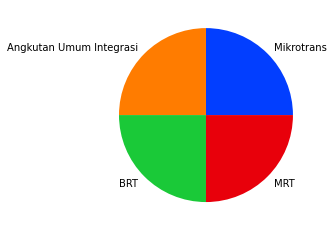

In [ ]:
# declaring data
data = [1, 1, 1, 1]
keys = jenis_keys
  
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='')
  
# displaying chart
plt.show()

### Pembahasan 1. 
Dari hasil grouping berdasarkan jenis Public Transport didapatkan hasil ada 4 Jenis Public Transport yang dikelola Pemprov DKI Jakarta. Dengan penjelasan sebagai berikut:

Jenis | Definition
---|---
`Angkutan Umum Integrasi` | Bus Non-BRT layanan Transjakarta yang melayani penumpangnya di jalur umum
`Mikrotrans` | Mikrotrans merupakan angkutan kota (angkot) dengan kapasitas lebih kecil
`MRT` | Moda Raya Terpadu, transportasi cepat berbasis rel yang berada di daerah DKI Jakarta
`BRT` | Bus dengan jalur khusus yang terpisah dari kendaraan publik lainnya


In [ ]:
# Permasalahan 2. Mengetahui trayek dari setiap jenis Public transport
# Mengetahui jumlah trayek dalam setiap jenis Public Transport
jenis_trayek = df1[['kode_trayek', 'jenis']].groupby('jenis').nunique()
jenis_trayek

,kode_trayek
jenis,
Angkutan Umum Integrasi,48
BRT,13
MRT,1
Mikrotrans,74


In [ ]:
# Detail trayek per jenis public transport.
detail_jenis_trayek = df1[['jenis','kode_trayek','trayek']].value_counts(normalize=True).reset_index()
detail_jenis_trayek.sort_values(by='jenis')

,jenis,kode_trayek,trayek,0
0,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,0.008081
91,Angkutan Umum Integrasi,1E,Pondok Labu - Blok M,0.008081
90,Angkutan Umum Integrasi,1F,Stasiun Palmerah - Bundaran Senayan,0.008081
89,Angkutan Umum Integrasi,1H,Tanah Abang - Stasiun Gondangdia,0.008081
88,Angkutan Umum Integrasi,1M,Meruya - Blok M,0.008081
...,...,...,...,...
74,Mikrotrans,"JAK,19",Pinang Ranti - Kampung Rambutan,0.008081
42,Mikrotrans,JAK.72,Kampung Rambutan - Pasar Rebo via Poncol,0.008081
43,Mikrotrans,JAK.71,Kampung Rambutan - Pinang Ranti,0.008081
45,Mikrotrans,JAK.61,Cempaka Putih - Pulo Gadung via Kelapa Gading,0.008081


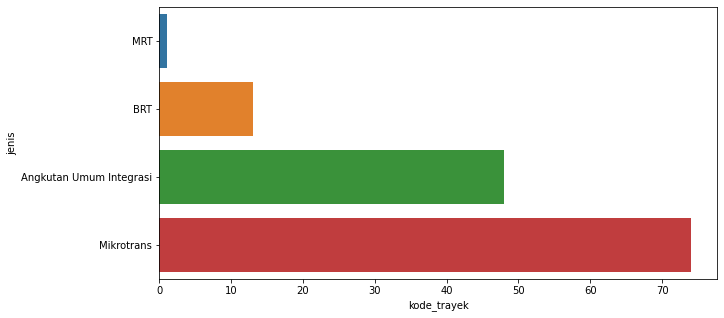

In [ ]:
# Visualisasi jenis publict transport dengan jumlah trayeknya
a = df1.groupby('jenis').nunique()['kode_trayek'].sort_values()
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(y=a.index, x=a, orient='h')

### Pembahasan 2.
Dari hasil pemeriksaan didapatkan bahwa dari jenis Public Transport memiliki beberapa trayek sebagai berikut:


Jenis Public Transport | Jumlah Trayek
--- | ---
Angkutan Umum Integrasi	| 48
BRT	| 13
MRT	| 1
Mikrotrans	| 74

In [ ]:
# Permasalahan 3. Mengetahui jumlah pengguna Public transport pertahun dan perharinya
# Mencari data pertahun
jenis=df1[(df1['jenis'] != 0)].groupby(['jenis'])['jumlah_penumpang'].sum()
pengguna_2021 = jenis
pengguna_2021

jenis
Angkutan Umum Integrasi    12727909.0
BRT                        59111356.0
MRT                         7170585.0
Mikrotrans                 49915801.0
Name: jumlah_penumpang, dtype: float64

In [ ]:
# Jumlah pengguna all Public Transport pertahun
pengguna_2021.sum()

128925651.0

[Text(0.5, 1.0, 'Jumlah Pengguna Public Transport Tahun 2021 \n Berdasarkan Jenis ')]

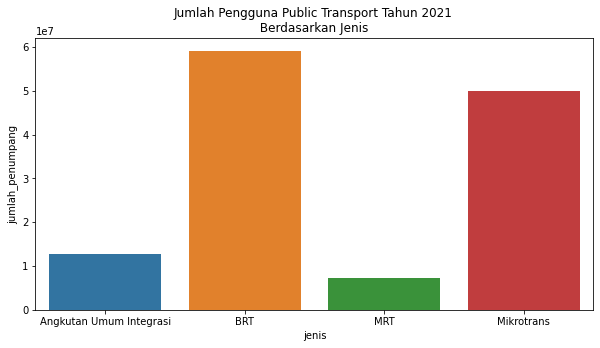

In [ ]:
# Membuat visualisasi dengan barplot pertahun
c = pengguna_2021
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(y=c, x=c.index).set(title='Jumlah Pengguna Public Transport Tahun 2021 \n Berdasarkan Jenis ')


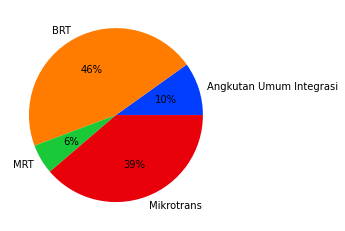

In [ ]:
# declaring data
data = pengguna_2021.values
keys = pengguna_2021.keys()
  
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.f%%')
  
# displaying chart
plt.show()

In [ ]:
# Menghitung pengguna Public transport perjenis dan perhari
pengguna_harian = jenis/365
pengguna_harian.round(0)

jenis
Angkutan Umum Integrasi     34871.0
BRT                        161949.0
MRT                         19645.0
Mikrotrans                 136756.0
Name: jumlah_penumpang, dtype: float64

In [ ]:
# Jumlah Pengguna all Public Transport perhari
total_harian = pengguna_harian.sum()
total_harian.round(0)

353221.0

[Text(0.5, 1.0, 'Jumlah Pengguna Public Transport Harian \n Berdasarkan Jenis ')]

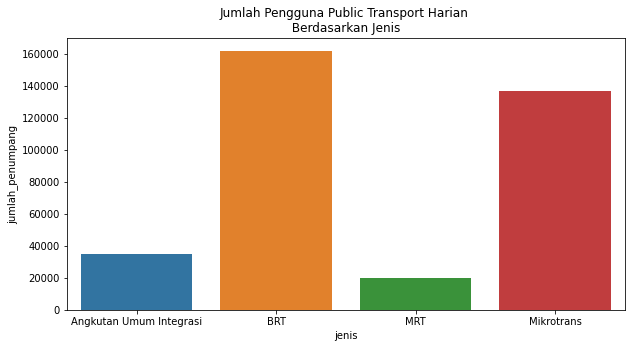

In [ ]:
# Membuat visualisasi dengan barplot
b = pengguna_harian
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(y=b, x=b.index).set(title='Jumlah Pengguna Public Transport Harian \n Berdasarkan Jenis ')


Berdasarkan diagram bar berdasarkan jumlah pengguna perbulan dan perharinya dapat terlihat Jenis Public Transport terbanyak pengguna yaitu BRT, Mikrotrans, Angkutan Umum Integrasi, dan terakhir MRT.

[Text(0.5, 1.0, 'Jumlah Pengguna Angkutan Umum Integrasi ')]

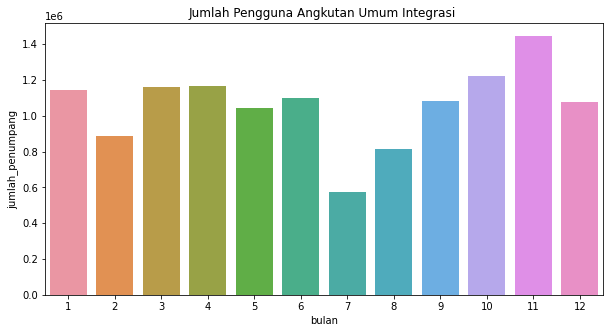

In [ ]:
# Menampilkan diagram permasing- masing jenis public transport
AUI=df1[(df1['jenis'] == 'Angkutan Umum Integrasi')].groupby(['bulan'])['jumlah_penumpang'].sum()
b = AUI
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(y=b, x=b.index).set(title='Jumlah Pengguna Angkutan Umum Integrasi ')


dari diagram jenis Angkutan Umum Integrasi terbanyak pada bulan 11 dan untuk setiap jumlah perbulannya berbeda.

[Text(0.5, 1.0, 'Jumlah Pengguna BRT')]

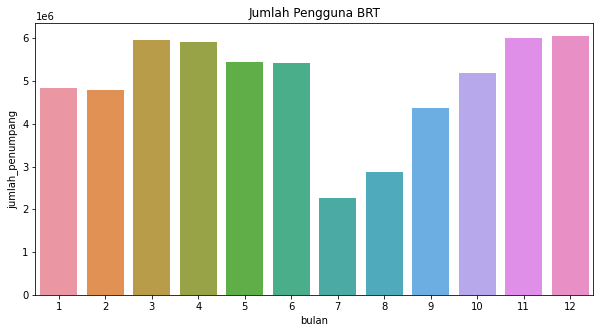

In [ ]:
AUI=df1[(df1['jenis'] == 'BRT')].groupby(['bulan'])['jumlah_penumpang'].sum()
b = AUI
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(y=b, x=b.index).set(title='Jumlah Pengguna BRT')


Untuk BRT dari diagram terlihat jumlah pengguna BRT hampir stabil diatas 4 juta pengguna setiap bulan, namun anjlok di bulan ke 7, dan terus naik dibulan berikutnya. Di bulan 10 jumlah pengguna sudah kembali diatas 4 juta dan mencapai puncak di bulan 12.

[Text(0.5, 1.0, 'Jumlah Pengguna MRT ')]

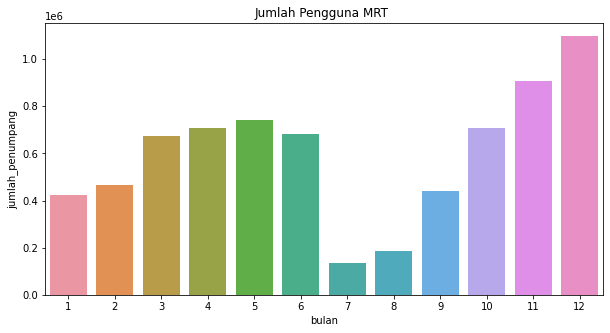

In [ ]:
AUI=df1[(df1['jenis'] == 'MRT')].groupby(['bulan'])['jumlah_penumpang'].sum()
b = AUI
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(y=b, x=b.index).set(title='Jumlah Pengguna MRT ')


Untuk diagram MRT terlihat jumlah penggunanya di awal bulan 1 sekitar 400 ribu pengguna dan bertahap naik di setiap bulanya sampai bulan ke 5. Bulan ke 6 penggunanya turun dibanding bulan 5, dan anjlok di bulan ke 7.

Dari bulan ke 7, jumlah pengguna beranjak menaik dan diakhir 2021 jumlah penumpang tembus diatas 1 juta pengguna.

[Text(0.5, 1.0, 'Jumlah Pengguna Mikrotrans ')]

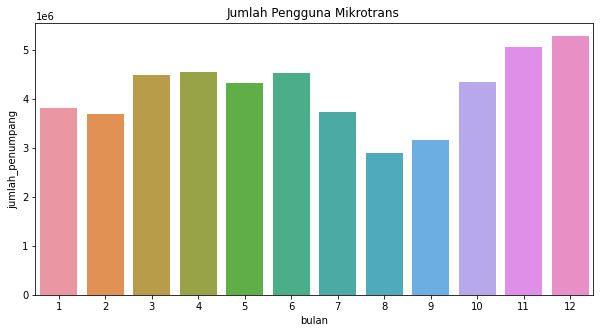

In [ ]:
AUI=df1[(df1['jenis'] == 'Mikrotrans')].groupby(['bulan'])['jumlah_penumpang'].sum()
b = AUI
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(y=b, x=b.index).set(title='Jumlah Pengguna Mikrotrans ')


Untuk Mikrotrans diagramnya tidak terlalu berbeda dengan diagram jenis public transport lainnya, namun yang unik titik terendahnya di bulan 8. Dibawah 3 juta pengguna, dan terus menaik dibulan berikutnya. 

### Pembahasan 3. 
Berdasarkan hasil olah data, didapatkan jumlah pengguna Public Transport  sebagai berikut.

Public Transport | Perhari | Pertahun 
--- | --- | ---
Angkutan Umum Integrasi	| 34.871 | 12.727.909
BRT	| 161.949 |  59.111.356
MRT	| 19.645 | 7.170.585
Mikrotrans	| 136.756 | 49.915.801

Dapat terlihat jenis Public Transport yang paling banyak pengguna/ penumpang pada Tahun 2021 adalah BRT, dengan jumlah pengguna 161.949 orang perhari atau 59 juta pengguna pertahun. Sedangkan tersedikit yaitu MRT dengan jumlah pengguna 19.645 orang perhari atau 7 juta orang pengguna selama tahun 2021.




In [ ]:
# 4. Mencari berapa persen pengguna Public Transport dengan asumsi
persen_pengguna = total_harian / 3477480
persen_pengguna

0.10157382979739224

In [ ]:
persen_jenis = pengguna_harian/3477480
persen_jenis

jenis
Angkutan Umum Integrasi    0.010028
BRT                        0.046571
MRT                        0.005649
Mikrotrans                 0.039326
Name: jumlah_penumpang, dtype: float64

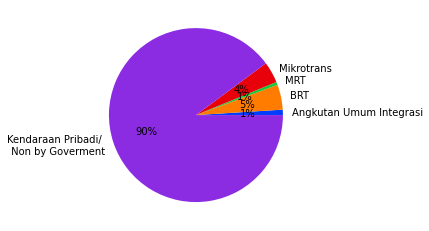

In [ ]:
# Piechart persentase pengguna public transport
persen_keys = ['Angkutan Umum Integrasi', 'BRT', 'MRT', 'Mikrotrans', 'Kendaraan Pribadi/ \n Non by Goverment']
persen_data = [0.010028, 0.046571, 0.005649, 0.039326, 0.90]


# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(persen_data, labels=persen_keys, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()

### Pembahasan 4.

Mengetahui berapa persen pengguna Public Transport dibanding pengguna jalan raya dengan berdasarkan asumsi, bahwa 60 % dari masyarakat usia produktif di Jakarta pergi untuk bekerja atau keperluan lainnya setiap hari. Maka pengguna jalan : 60% x 5.795.801 orang = 3.477.480 orang pengguna jalan setiap harinya.

Berdasarkan asumsi pengguna jalan diatas maka pengguna Public Transport yang dikelola Pemprov DKI baru mencapai 10% pada tahun 2021

In [ ]:
# Permasalahan 5. Mengetahui trayek dengan jumlah pengguna terbanyak dan tersedikit selama tahun 2021
trayek_2021=df1.groupby(['jenis', 'trayek']).sum()['jumlah_penumpang'].reset_index()
trayek_2021.sort_values(by='jumlah_penumpang')

,jenis,trayek,jumlah_penumpang
43,Angkutan Umum Integrasi,Taman Kota Intan - Museum Bahari,232.0
14,Angkutan Umum Integrasi,Kota Tua Explorer,376.0
38,Angkutan Umum Integrasi,Stasiun Manggarai - Ragunan,377.0
3,Angkutan Umum Integrasi,Dukuh Atas - Casablanca via Epicentrum Raya,608.0
29,Angkutan Umum Integrasi,Ragunan - Departemen Pertanian,1386.0
...,...,...,...
53,BRT,Lebak Bulus - Harmoni,5122397.0
50,BRT,Kalideres - Pasar Baru,5250726.0
61,MRT,All Station,7170585.0
55,BRT,Pinang Ranti - Pluit,7694406.0


### Pembahasan 5

Berdasarkan proses data diketahui trayek dengan jumlah terbanyak pengguna atau penumpang adalah Trayek Blok M - Kota dengan jenis BRT sebanyak 10,079,752 penumpang selama tahun 2021.

Sedangkan trayek yang paling sedikit penggunanya adalah Taman Kota Intan - Museum Bahari dengan jenis Angkutan Umum Terintegrasi, hanya 232 penumpang selama tahun 2021. 

Hal ini bisa jadi perhatian bagi Pemprov DKI, untuk trayek dengan jumlah pengguna tertinggi agar diperhatikan pengaturan jadwal keberangkatan lebih rapat dan jumlah armada ditambah atau kapasitas armada yang lebiha banyak sehingga tidak terjadi penumpukan penumpang. 

Sedangkan untuk trayek terdikit harus diperhatikan apakah merupakan trayek yang baru dibuka, atau memang sedikit penumpangnya. Apabila sedikit bisa coba untuk digabung dengan trayek terdekat lainnya. sehingga lebih efektif dan tidak membuang biaya untuk operasional nya.




In [ ]:
# Permasalahan 6.  Mencari bulan terbanyak pengguna Public Transport
bulan_terbanyak=df1.groupby(['bulan']).sum()['jumlah_penumpang']
bulan_terbanyak.sort_values(ascending= False)

bulan
12    13517985.0
11    13417898.0
4     12334097.0
3     12267095.0
6     11727226.0
5     11566913.0
10    11466174.0
1     10221334.0
2      9848327.0
9      9065697.0
8      6776221.0
7      6716684.0
Name: jumlah_penumpang, dtype: float64

In [ ]:
px.line(bulan_terbanyak, title=('Jumlah Pengguna Public Transport Tahun 2021')).show()

Terlihat dari grafik line pada awal tahun jumlah pengguna diatas 10 juta, di bulan 2 mengalami penurunan pengguna menjadi dibawah 10 juta kemudian naik lagi di bulan berikutnya. Di bulan 7 jumlah pengguna drop drastis hingga dibawah 7 juta pengguna. Di Bulan ke 8 ada pengingkatan pengguna dan terus menaik sampai bulan desember dengan lebih dari 13 juta pengguna Public Transport 

In [ ]:
#  Menghitung bulan dengan rata2 harian terbanyak
bulan_rata2_terbanyak =bulan_terbanyak.sort_values(ascending= False)/365
bulan_rata2_terbanyak

bulan
12    37035.575342
11    36761.364384
4     33792.046575
3     33608.479452
6     32129.386301
5     31690.172603
10    31414.175342
1     28003.654795
2     26981.717808
9     24837.526027
8     18564.989041
7     18401.873973
Name: jumlah_penumpang, dtype: float64

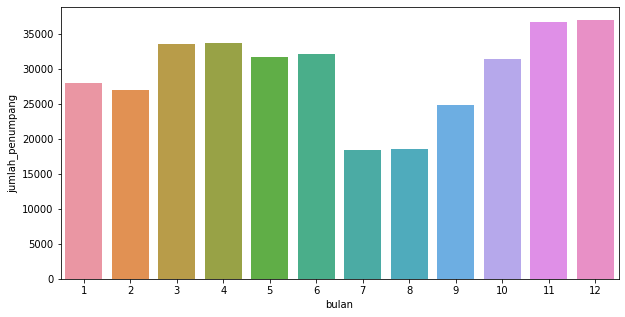

In [ ]:
rata2_bulan= bulan_rata2_terbanyak
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(x=rata2_bulan.index,y=rata2_bulan)

### Pembahasan 6.
Dari data terlihat bahwa jumlah pengguna Public Transport terbanyak pada bulan Desember yaitu 13,5 juta pengguna dan diikuti bulan November 13,4 juta pengguna. Untuk tersedikit penggunanya adalah di bulan Juli dengan jumlah pengguna 6,71 juta orang.

Hal ini bila dikaitkan dengan kondisi saat tahun 2021 bisa sangat menjelaskan dari pengaruh pembatasan kegiatan masyarakat dan pembatasan kapasitas transportasi. Bila pembatasan sedang tinggi jumlah pengguna akan langsung berkurang drastis.

Dan pada bulan Juli 2021 merupakan terendah karena tertinggi pembatasan kegiatan masyarakat saat itu. Kondisi puncak pandemi setelah libur lebaran 2021. Regulasi dari pemerintah sangat berimbas terhadap jumlah pengguna Public Transport.


In [ ]:
# Permasalahan 7. Mencari central tendency dari jenis BRT 
jenis_brt = df1[df1["jenis"] == 'BRT']
jenis_brt

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,rata2_perhari
70,2021,1,BRT,9,Pinang Ranti - Pluit,622613.0,20084.0
71,2021,1,BRT,8,Lebak Bulus - Harmoni,419996.0,13548.0
72,2021,1,BRT,7,Kampung Rambutan - Kampung Melayu,377657.0,12182.0
73,2021,1,BRT,6,Ragunan - Dukuh Atas 2,320411.0,10336.0
74,2021,1,BRT,5,Kampung Melayu - Ancol,400573.0,12922.0
...,...,...,...,...,...,...,...
1443,2021,12,BRT,13,Ciledug - Tendean,337233.0,10878.0
1444,2021,12,BRT,12,Penjaringan - Sunter Bouleverd Barat,167399.0,5400.0
1445,2021,12,BRT,11,Pulo Gebang - Kampung Melayu,163776.0,5283.0
1446,2021,12,BRT,10,Tanjung Priok - PGC 2,419198.0,13523.0


In [ ]:
# Mengetahui central tedency menggunakan fungsi .describe
jenis_brt['rata2_perhari'].describe()

count      156.000000
mean     12478.980769
std       6985.550366
min       2013.000000
25%       7255.000000
50%      11819.500000
75%      15014.750000
max      36498.000000
Name: rata2_perhari, dtype: float64

In [ ]:
# Mencari nilai skew
jenis_brt['rata2_perhari'].skew()

1.204582104398955

In [ ]:
jenis_brt[jenis_brt['rata2_perhari']>=35000]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,rata2_perhari
1318,2021,11,BRT,1,Blok M - Kota,1073929.0,35798.0
1447,2021,12,BRT,1,Blok M - Kota,1131439.0,36498.0


Berdasarkan central tendency awal, bisa dibaca bahwa rata2 perhari untuk trayek dari jenis BRT membawa penumpang 12.478 penumpang, dan trayek tersedikit yaitu 2.012 penumpang perharinya dan trayek terbanyak membawa 36.498 penumpang perharinya dengan nilai standar deviasi 6,985.

Bila dilihat dari penjabaran central tendency berdasarkan tipe numeric continues, membandingkan data perbulan. Pada BRT ini kondisinya yaitu mean lebih besar dari median, serta nilai skewnya > 1 maka distribusinya atau Diagram akan sangat miring ke kanan.

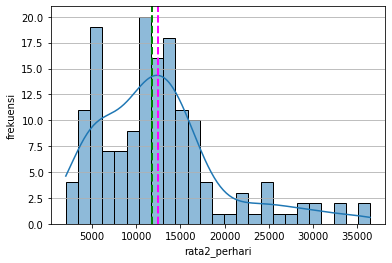

In [ ]:
# Visualisasi histogram untuk melihat bentuk distribusinya
# Terlihat histogram mendekati sangat miring ke kanan
brt = jenis_brt['rata2_perhari']
fig, ax = plt.subplots()
sns.histplot(brt, bins=25, kde=True)
plt.axvline(brt.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(brt.median(), color='green', linestyle='dashed', linewidth=2)
ax.set_ylabel('frekuensi')
ax.grid(axis='y')

mean :  12478.98076923077
max :  36498.0


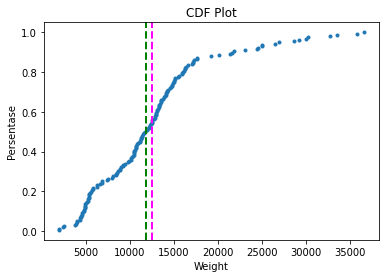

In [ ]:
# Membuat CDF Plot untuk analisis tambahan terkait jenis BRT
# data = np.random.normal(100, 20, 1000) #max 100, min 20, jumlah 1000 data
data= jenis_brt['rata2_perhari']
print('mean : ',data.mean())
print('max : ',data.max())

# Hitung CDF dari data sampel
sorted_data = np.sort(data)
probs = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Plot CDF
plt.plot(sorted_data, probs, marker=".", linestyle="none")

# Tambahkan axis label dan judul
plt.xlabel("Weight")
plt.ylabel("Persentase")
plt.title("CDF Plot")

# Tambahkan line untuk tunjukan posisi, mean, median, modus
plt.axvline(brt.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(brt.median(), color='green', linestyle='dashed', linewidth=2)


# Tampilkan plot
plt.show()

Berdasarkan hasil plot CDF terlihat bentuknya tidak seperti huruf S sehingga dapat dikategorikan distribusi tidak normal.

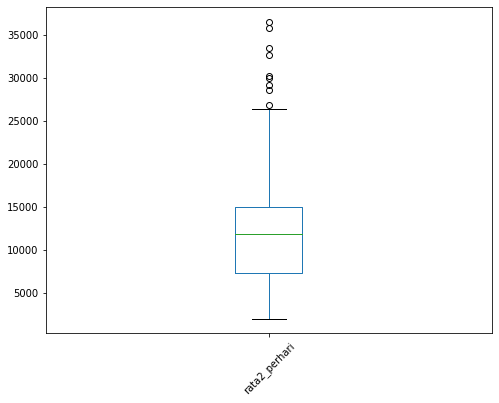

In [ ]:
# Melakukan visualisasi dengn boxplot untuk melihat lebih jelas outlier
brt1 = jenis_brt[['trayek','rata2_perhari']]

boxplot = brt1.boxplot(grid=False, rot=45,  figsize=(8,6))

Dari hasil pengecekan outlier, terdapat outlier darai rata2 perhari diatas 25.000. Namun untuk perlu dihapus atau tidak bisa dilihat dulu dengan kondisi pada tahun 2021.

Pada tahun 2021 masih terjadi pembatasan penumpang Public Transport dikarenakan PPKM masih berlaku. Sedangkan di akhir Tahun 2021 sudah mulai ada pelonggaran pembatasan kapasitas penumpang bisa mencapai 75%. 

Sehingga bila ada outlier maka diangap data real dan tidak perlu dihapus, karena bisa terjadi kenaikan jumlah penumpang signifikan akibat longgarnya regulasi PPKM


## Pembahasan 7. 
Untuk pengujian central tendecy ini dilakukan pada jenis Public Transport BRT dikarenakan jumlah pengguna Public Transport terbanyak pada tahun 2021 adalah jenis BRT. Semua trayek dari BRT pada tahun 2021 di jadikan satu untuk dihitung mean, median, standar deviasi, dan nilai skew. 


Dari hasil ujinya didapatkan hasil sebagai berikut,rata- rata jumlah penumpang pada setiap trayeknya yaitu 12.478 orang, sedangkan nilai tengahnya yaitu 11.819 penumpang. Kondisi ini menunjukan rata2 trayek BRT lebih besar dibanding nilai tengah. Dari kondisi tersebut sudah dapat diperkirakan bahwa distribusinya tidak simetris. 

Dari kondisi terebut dilakukan lagi pengujian nilai kemiringan dan didapatkan nilai 1,2. Yang pada standarnya nilai kemiringan diatas 1 menunjukan distribusi / Diagram nya sangat miring ke kanan.

Untuk Mengetahui penyebabnya dilakukan pengujian dengan visualisasi boxplot dan terlihat adanya outlier atau jumlah pengemudi yang diatas batak maksimum. Namun untuk di kasus BRT ini outlier tidak dihapus dikarenkan kondisi di akhir tahun 2021 ada pelonggaran kapasitas penumpang. Sehingga jumlah tersebut masih dalam batas toleransi.

Untuk lebih jelas seharusnya jumlah penumpang tahun 2021 bisa dibandingkan dengan data tahun kondisi yang normal, tidak ada Pembatasan Kegiatan Masyarakat dikarenakan pandemi Covid 19. 

In [ ]:
# Permasalahan 8. Tahap pertama mencari mean dari semua trayek perbulan
trayek_brt =jenis_brt.groupby(['kode_trayek','trayek']).sum()['jumlah_penumpang']
trayek_brt


kode_trayek  trayek                              
1            Blok M - Kota                           10079752.0
10           Tanjung Priok - PGC 2                    4262272.0
11           Pulo Gebang - Kampung Melayu             1603385.0
12           Penjaringan - Sunter Bouleverd Barat     1620307.0
13           Ciledug - Tendean                        3337261.0
2            Pulo Gadung 1 - Harmoni                  3836531.0
3            Kalideres - Pasar Baru                   5250726.0
4            Pulo Gadung 2 - Tosari                   3032454.0
5            Kampung Melayu - Ancol                   4902814.0
6            Ragunan - Dukuh Atas 2                   3996604.0
7            Kampung Rambutan - Kampung Melayu        4372447.0
8            Lebak Bulus - Harmoni                    5122397.0
9            Pinang Ranti - Pluit                     7694406.0
Name: jumlah_penumpang, dtype: float64

In [ ]:
# Mencari rata2 perhari untuk setiap trayek
rata2_trayekbrt = jenis_brt.groupby('trayek').mean()['rata2_perhari'].sort_values(ascending=False)
rata2_trayekbrt

trayek
Blok M - Kota                           27659.166667
Pinang Ranti - Pluit                    21113.250000
Kalideres - Pasar Baru                  14414.250000
Lebak Bulus - Harmoni                   14057.833333
Kampung Melayu - Ancol                  13454.166667
Kampung Rambutan - Kampung Melayu       12003.000000
Tanjung Priok - PGC 2                   11697.833333
Ragunan - Dukuh Atas 2                  10969.333333
Pulo Gadung 1 - Harmoni                 10528.000000
Ciledug - Tendean                        9156.833333
Pulo Gadung 2 - Tosari                   8324.833333
Penjaringan - Sunter Bouleverd Barat     4447.750000
Pulo Gebang - Kampung Melayu             4400.500000
Name: rata2_perhari, dtype: float64

Dari rata2 setiap jenis trayek memiliki rata yang berbeda dan ada trayek yang beda sangat signifikan.

In [ ]:
px.bar(rata2_trayekbrt, title=('Trayek BRT Tahun 2021')).show()


Terlihat dari diagram Trayek Blok M- Kota terbanyak dan tersedikit trayek Pulo Gebang

In [ ]:
# Untuk menguji Anova menguji hipotesis
# Membuat dataframe pertrayek berdasarkan rata2 harian tahun 2021
blokm_kota = jenis_brt[jenis_brt.trayek == 'Blok M - Kota'].groupby('bulan').sum()['rata2_perhari']
priok_pgc = jenis_brt[jenis_brt.trayek == 'Tanjung Priok - PGC 2'].groupby('bulan').sum()['rata2_perhari']
gebang_melayu = jenis_brt[jenis_brt.trayek == 'Pulo Gebang - Kampung Melayu'].groupby('bulan').sum()['rata2_perhari']
penjaringan_sunter = jenis_brt[jenis_brt.trayek == 'Penjaringan - Sunter Bouleverd Barat'].groupby('bulan').sum()['rata2_perhari']
ciledug_tendean = jenis_brt[jenis_brt.trayek == 'Ciledug - Tendean'].groupby('bulan').sum()['rata2_perhari']
gadung_harmoni = jenis_brt[jenis_brt.trayek == 'Pulo Gadung 1 - Harmoni'].groupby('bulan').sum()['rata2_perhari']
kalideres_psbaru = jenis_brt[jenis_brt.trayek == 'Kalideres - Pasar Baru'].groupby('bulan').sum()['rata2_perhari']
gadung_tosari = jenis_brt[jenis_brt.trayek == 'Pulo Gadung 2 - Tosari'].groupby('bulan').sum()['rata2_perhari']
melayu_ancol = jenis_brt[jenis_brt.trayek == 'Kampung Melayu - Ancol'].groupby('bulan').sum()['rata2_perhari']
ragunan_dukuh = jenis_brt[jenis_brt.trayek == 'Ragunan - Dukuh Atas 2'].groupby('bulan').sum()['rata2_perhari']
rambutan_melayu = jenis_brt[jenis_brt.trayek == 'Kampung Rambutan - Kampung Melayu'].groupby('bulan').sum()['rata2_perhari']
bulus_harmoni = jenis_brt[jenis_brt.trayek == 'Lebak Bulus - Harmoni'].groupby('bulan').sum()['rata2_perhari']
pinang_pluit = jenis_brt[jenis_brt.trayek == 'Pinang Ranti - Pluit'].groupby('bulan').sum()['rata2_perhari']



In [ ]:
# Menghitung Pvalue dengan menggunakan fungsi annova ftest oneway.
f_stat,p_value = stats.f_oneway(blokm_kota,priok_pgc,gebang_melayu,penjaringan_sunter,ciledug_tendean,gadung_harmoni,kalideres_psbaru,gadung_tosari,melayu_ancol,ragunan_dukuh,rambutan_melayu,bulus_harmoni,pinang_pluit)
print('P-value:',p_value)
print('F_stat:',  f_stat)

P-value: 5.68121696582806e-38
F_stat: 37.12758946704434


### Pembahasan 8.

Jenis Public Transport BRT adalah jenis Public trasnport yang dikelola Pemprov DKI dengan terbanyak jumlah penggunanya pada tahun 2021.  Bila dilihat dari trayeknya setiap trayek mempunyai pengaruh signifikan terhadap jumlah penguna perharinya dari jenis BRT.

Berdasarkan hal tersebut dilakukan uji statmentnya apakah benar, setiap trayek memiliki pengaruh signifikan. Sehingga ditetapkan hipotesa sebagai berikut:

```
H 0 : Semua trayek = jumlah pengguna
H 1 : Semua trayek != jumlah pengguna
```

Dengan membandingkan dari masing- masing trayek (kelompok) maka dianalisis menggunkan Anova. Berdasarkan statistik uji Anova didapatkan hasil:
*  P-value = 5.68121696582806e-38 atau 0.00000000000000000000000...056812

Berdasarkan nilai P Value tersebut lebih kecil dari 0.05 maka dipastikan untuk menolak H0, yaitu menolak hipotesa bahwa semua trayek sama jumlah pengguna nya.


# VI. Kesimpulan

Berdasarkan analisis yang sudah dilakukan untuk menjawab penjabaran masalah dari problem statement, dapat disimpulkan sebagai berikut.

Pemerintah Provinsi DKI Jakarta pada tahun 2021 menyediakan atau mengelola 4 jenis Transportasi Umum yaitu Angkutan Umum Terintegrasi, BRT, MRT, dan Mikrotrans. Untuk setiap jenis memiliki kode trayek dan trayek yang berbeda. 
Untuk jenis public transport dengan trayek terbanyak adalah Mikrotrans dengan 74 trayek dan tersedikit adalah MRT 1 trayek.

Dari jumlah penumpang yang menggunakan Public Transport, pada tahun 2021 jumlah penggunanya sebanyak 128.925.651 orang dan jumlah pengguna perharinya yaitu 353.221 orang. Untuk bulan dengan jumlah pengguna tertinggi ada pada bulan November dengan jumlah pengguna 13.517.985 orang/ bulan. Sedangkan untuk jenis yang paling banyak digunakan yaitu BRT dengan jumlah pengguna sebanyak 161.949 orang perhari atau 59 juta pengguna pertahun.

Berdasarkan jumlah pengguna Public trasnport dapat dibandingkan dengan jumlah pengguna jalan raya di DKI Jakarta, dengan menggunakan asumsi pengguna jalan DKI Jakarta adalah 60% dari jumlah Warga usia produktif. Didapatkan hasil bahwa pengguna Public transport baru berkisar 10 % dari asumsi jumlah pengguna jalan tersebut.

Dari sisi trayek jumlah pengguna terbanyak yaitu trayek Blok M- Kota sebanyak 10,079,752 penumpang selama tahun 2021 dari jenis BRT. Dan dari hasil Uji jumlah pengguna dari masing -  masing trayek perharinya tidak merata, ada hari di bulan tertentu jumlah penumpang sangat banyak ada juga yang sangat dikit. Dan dari antar trayek juga tidak merata, ada trayek yang sangat gemuk tapi ada juga trayek yang sangat sedikit jumlah penggunanya.

Dari kondisi diatas dapat dikatakan bahwa setiap trayek memiliki pengaruh terhadap jumlah pengguna Public Transport dan sudah diuji dengan uji hipotesa menggunakan analisis Anova dengan hasil menolak Hipotesa H0. Bahwa tidak dapat menerima bahwa semua trayek memiliki jumlah pengguna yang sama.

## Saran

Data ini belum bisa dianggap 100% sesuai karena saat diawal dapat dilihat bahwa pada bulan 12 untuk jenis Public Transport Angkutan Umum Integrasi bernilai 0 semua. Sementara hal tersebut tidak sesuai dengan kondisi real dilapangan. Layanan Angkutan Umum Integrasi tetap ada pada bulan Desember 2021.

Selain itu sebenarnya masih ada 1 jenis Public Transport yang belum dimasukan yaitu LRT, dikarenakan masih belum beroperasi secara normal atau masih terbatas sehingga tidak ditampilkan datanya oleh pihak Pemprov DKI Jakarta.

Untuk project berikutnya bisa ditambahkan untuk forecasting tahun yang akan datang apabila datanya sudah lengkap.




# VII. Sumber Referensi

Sumber data 
1. [Penumpang MRT 2021](https://data.jakarta.go.id/dataset/data-penumpang-mrt-2021-di-provinsi-dki-jakarta)
2. [Penumpang Transjakarta 2021](https://data.jakarta.go.id/dataset/data-penumpang-bus-transjakarta-januari-2021)
3. [Jumlah Penduduk DKI 2021](https://jakarta.bps.go.id/indicator/12/111/1/jumlah-penduduk-provinsi-dki-jakarta-menurut-kelompok-umur-dan-jenis-kelamin.html)
4. [Mikrotrans](https://smartcity.jakarta.go.id/id/blog/cek-informasi-mikrotrans-auto-gampang-pakai-fitur-jaklingko/)
5. [BRT dan Angkuta Umum Integrasi](https://transjakarta.co.id/faq-transjakarta/#:~:text=BRT%20merupakan%20singkatan%20dari%20Bus,(bergabung%20dengan%20kendaraan%20lainnya).)
6. [MRT](https://id.wikipedia.org/wiki/MRT_Jakarta)

